# 차원축소
- 주성분 분석 : 이미지 압축할때처럼 비슷한 특성끼리 퉁쳐서 특성갯수 줄이는 것
- 그럼 빨라진다

In [1]:
import numpy as np
import matplotlib.pyplot as plt
fruits = np.load('data/fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [32]:
# 주성분 분석 해주는 함수
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [33]:
pca.components_.shape

(50, 10000)

In [34]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)

    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

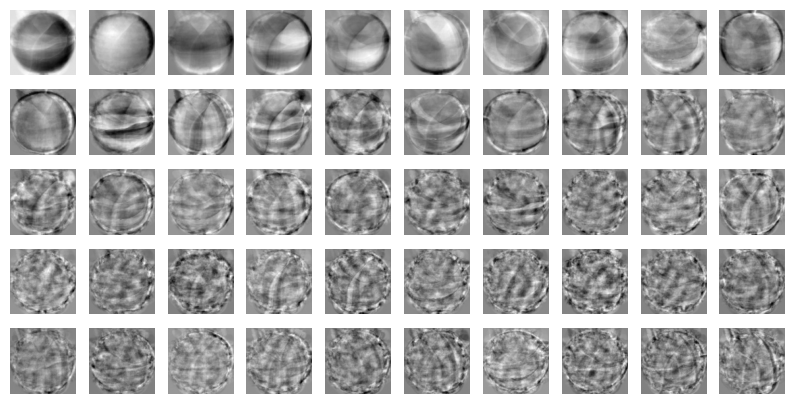

In [35]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [36]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_2d.shape)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


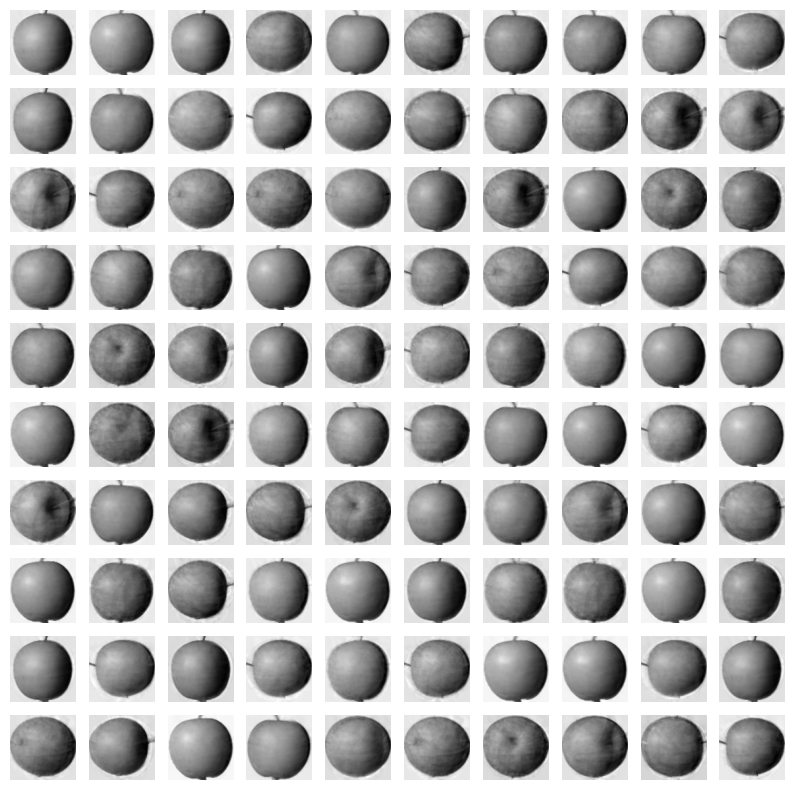

In [37]:
fruits_inverse = pca.inverse_transform(fruits_pca)
f = fruits_inverse.reshape(-1, 100, 100)
draw_fruits(f[:100])

- 압축햇다가 다시 풀었을때 사진이 잘 보이면 압축시에도 압축이 잘 되었었다라고 볼 수 있다
- (특성이 끼리끼리 잘 묶였다)

In [38]:
np.sum([pca.explained_variance_ratio_]) # 나온 수치만큼 원본데이터를 가지고 있다

np.float64(0.9215344609440433)

In [39]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
# 임의로 분류해보면서 타켓을 정해보겠다(이미 알고있어서 가능한 진행방법)
# 지도학습으로 비지도학습과 어떤 차이가 있는지를 보려 하는 것
target = np.array([0]*100 + [1]*100 + [2]*100)

In [41]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(scores)

{'fit_time': array([0.1525619 , 0.13339305, 0.13465309, 0.14870358, 0.1523068 ]), 'score_time': array([0.00204802, 0.00198603, 0.00205994, 0.00188613, 0.00251412]), 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}


In [19]:
scores = cross_validate(lr, fruits_pca, target)
print(scores)
# fit_time 첫번째 인덱스를 보면 시간이 많이 줄었음을 알 수 있다

{'fit_time': array([0.01555848, 0.04450583, 0.01335073, 0.02097893, 0.02458692]), 'score_time': array([0.00064588, 0.00089025, 0.00100756, 0.00089335, 0.00052547]), 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}


In [25]:
pca = PCA(n_components=0.5) # 이거 무슨 의미인지 찾아보기
pca.fit(fruits_2d)
pca.n_components_

np.int64(2)

- int64보니까 2개로 압축해도 될거같은데? 라는 출력값의 의미

In [26]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [27]:
scores = cross_validate(lr, fruits_pca, target)
scores

C:\Users\1-04\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\1-04\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

{'fit_time': array([0.03243494, 0.01975513, 0.01820302, 0.01144266, 0.02071095]),
 'score_time': array([0.00056863, 0.00049996, 0.00050116, 0.00051761, 0.00045943]),
 'test_score': array([0.98333333, 1.        , 1.        , 0.98333333, 1.        ])}

test_score : 98% 100% 100% 98%.. 등으로 잘 분류되었다.

In [28]:
from sklearn.cluster import KMeans

km  = KMeans(n_clusters=3)
km.fit(fruits_pca)

KMeans(n_clusters=3)

In [29]:
km.labels_

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], d

- 군집화가 잘 된것을 볼 수 있다
- 10000개의 특성이면 그래프로 못그리는데 특성을 2개로 줄여서 이젠 그래프로 그릴 수 있을거같다

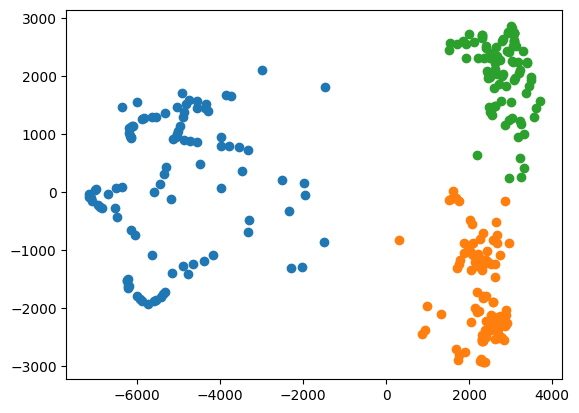

In [31]:
for label in range(3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])